In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from typing import Tuple


In [7]:
MIRFLICKR_PATH = 'MIRFLICKR'
PROKUDIN_PATH = 'prokudin_gorskii_images'
FLICKR30_PATH = 'FLICKR30'
PATH_SAVE = 'SP'
FINAL_DATASET_256 = 'DATASET_256'
FINAL_DATASET_128 = 'DATASET_128'
L_DATASET_256 = 'L_DATASET_256'
L_DATASET_128 = 'L_DATASET_128'


OUT_SIZE_256 = (256, 256)
OUT_SIZE_128 = (128, 128)
MIN_IMG_SIZE = 256

### Отсев фотографий слишком малого размера

In [8]:
def size_selection(path: str, min_size: int) -> None:
    names = [path + '\\' + i for i in os.listdir(path)]
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        if img.shape[0] < min_size or img.shape[1] < min_size:
            os.remove(name)

### График размеров фотографий

In [ ]:
def size_graph(path: str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    fig, ax = plt.subplots()
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')

    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        ax.plot(
            img.shape[0], img.shape[1], marker='o',
            color='b', fillstyle = 'full')
    ax.plot(
        [min(min(ax.axes.get_xlim()), 256), max(max(ax.axes.get_xlim()), 256)],
        [256, 256], ls =':', color = 'r')
    ax.plot(
        [256, 256], [min(min(ax.axes.get_ylim()), 256),
                     max(max(ax.axes.get_ylim()), 256)], ls =':', color = 'r')
    

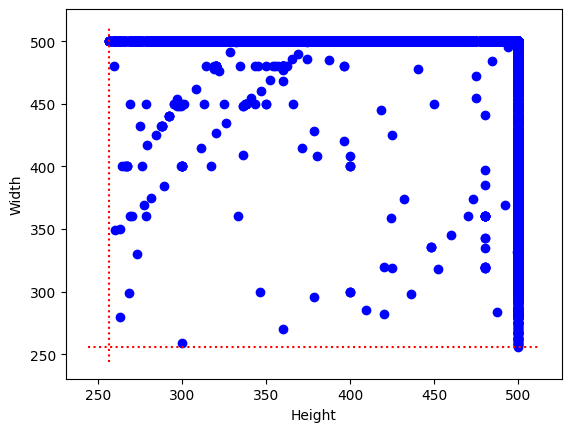

In [ ]:
size_graph(FLICKR30_PATH)

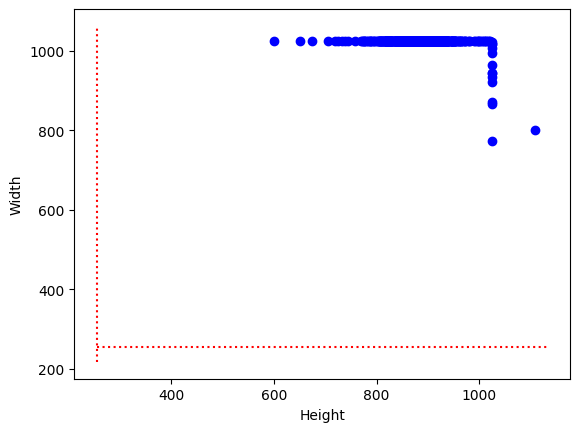

In [11]:
size_graph(PROKUDIN_PATH)


### Отображение среднего значения в канале и его стандартного отклонения

In [ ]:
def color_map(path:str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    fig, axis = plt.subplots(3, figsize=(7, 21))
    
    axis[0].set_title('L-channel')
    axis[1].set_title('a-channel')
    axis[2].set_title('b-channel')

    axis[0].set_xlabel('Mean')
    axis[0].set_ylabel('STD')
    axis[1].set_xlabel('Mean')
    axis[1].set_ylabel('STD')
    axis[2].set_xlabel('Mean')
    axis[2].set_ylabel('STD')
    
    l_ch_ = []
    a_ch_ = []
    b_ch_ = []
    l_ch_std = []
    a_ch_std = []
    b_ch_std = []

    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))

        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})
        
        l_ch_.append(df_ch['l_ch'].mean())
        a_ch_.append(df_ch['a_ch'].mean())
        b_ch_.append(df_ch['b_ch'].mean())
        l_ch_std.append(df_ch['l_ch'].std())
        a_ch_std.append(df_ch['a_ch'].std())
        b_ch_std.append(df_ch['b_ch'].std())
        
    df_chs = pd.DataFrame(
        {
            'l_ch': l_ch_, 'a_ch': a_ch_, 'b_ch': b_ch_, 'l_std':l_ch_std,
            'a_std': a_ch_std, 'b_std': b_ch_std})
    
    axis[0].scatter(l_ch_, l_ch_std, marker = '.', color = 'b')
    axis[1].scatter(a_ch_, a_ch_std, marker = '.', color = 'r')
    axis[2].scatter(b_ch_, b_ch_std, marker = '.', color = 'm')
    sns.kdeplot(df_chs, x='l_ch', y='l_std', ax=axis[0], color='k')
    sns.kdeplot(df_chs, x='a_ch', y='a_std', ax=axis[1], color='k')
    sns.kdeplot(df_chs, x='b_ch', y='b_std', ax=axis[2], color='k')


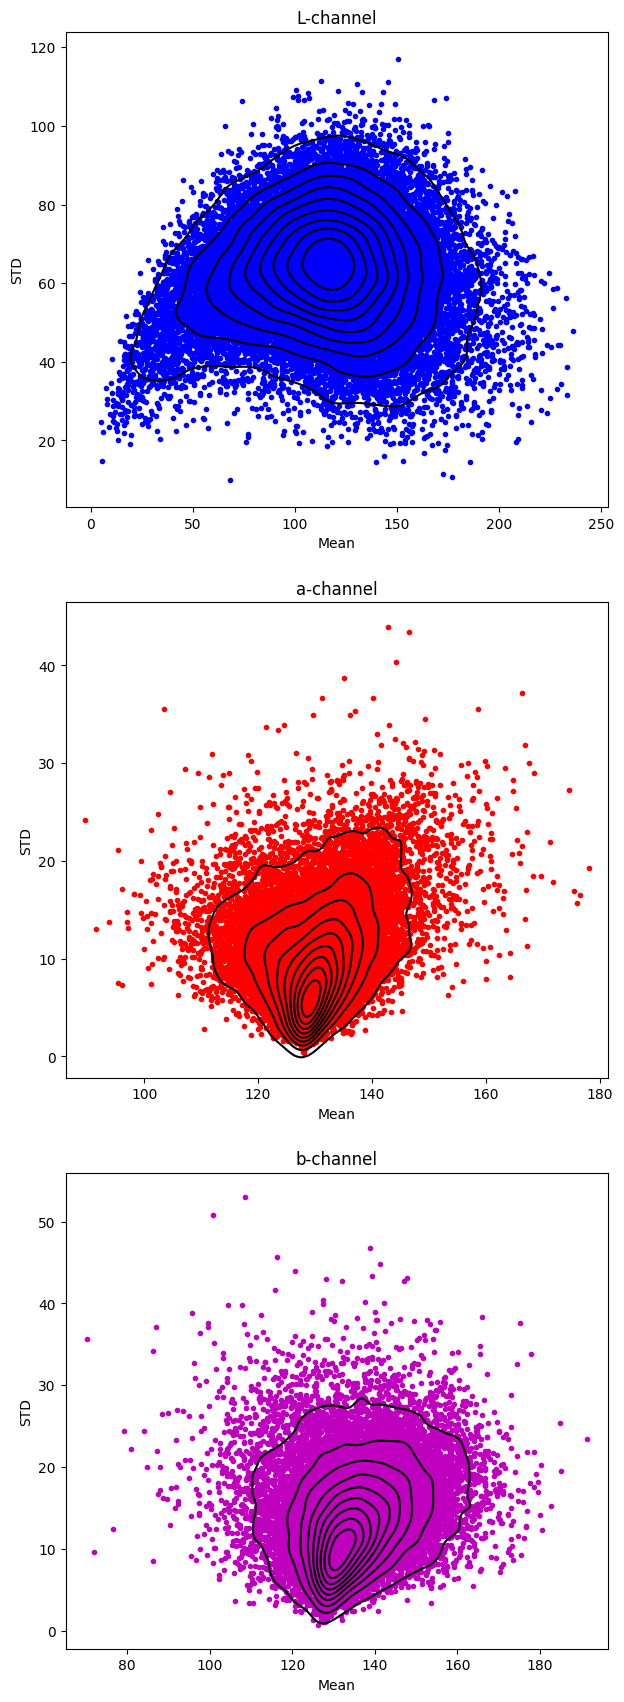

In [13]:
color_map(FLICKR30_PATH)

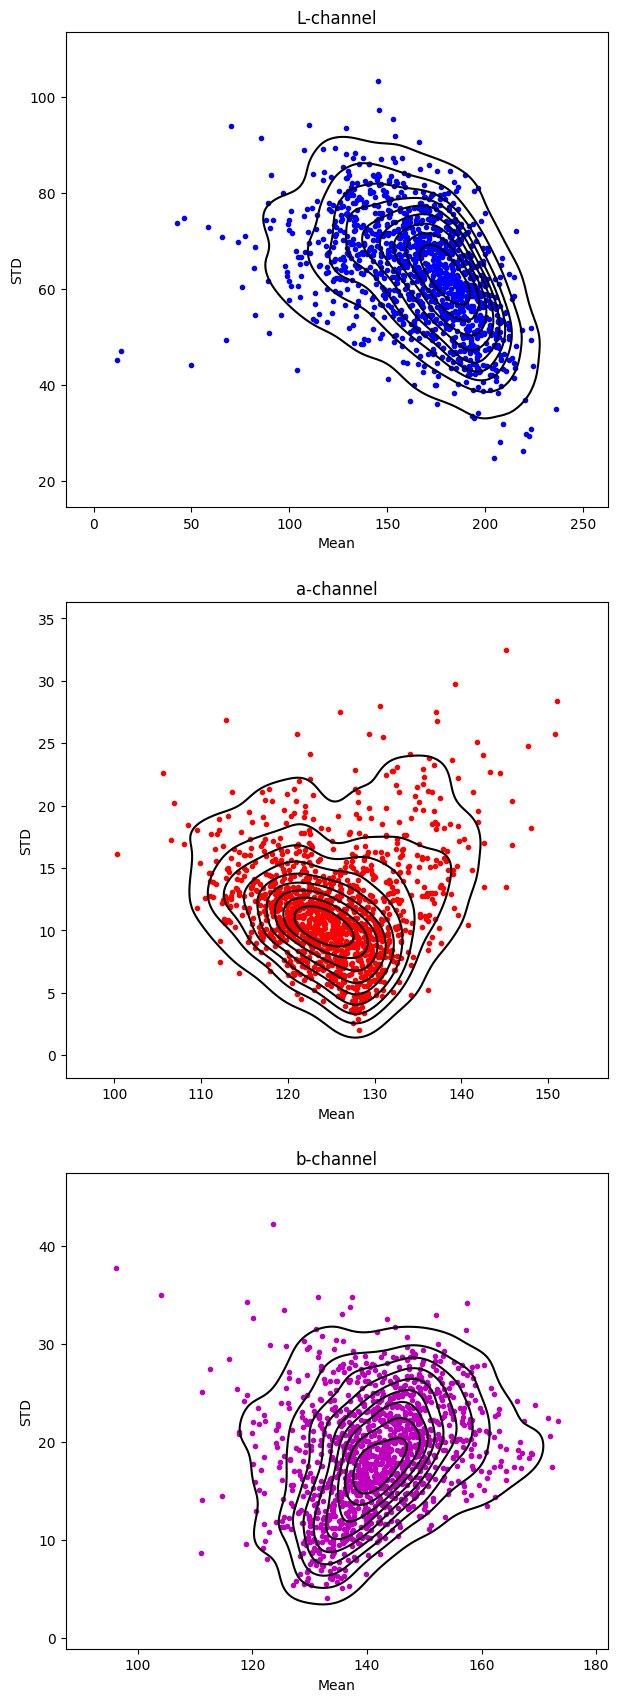

In [14]:

color_map(PROKUDIN_PATH)

### Отбор фотографий по стандартному отклонению в каналах

In [ ]:
def color_select(path:str, path_save: str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})
        
        if df_ch['a_ch'].std() < 1 or df_ch['b_ch'].std() < 1:
            cv2.imwrite(os.path.join(path_save, os.path.split(name)[-1]), img)

In [16]:
color_select(FLICKR30_PATH, PATH_SAVE)

### Удаление фотографий  

In [17]:
names = [os.path.join(PATH_SAVE, i) for i in os.listdir(PATH_SAVE)]
for name in names:
    img = cv2.imread(name, cv2.IMREAD_COLOR)
    img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
    try:
        os.remove(FLICKR30_PATH + '\\' + name.split('\\')[-1])
    except:
        ...


### Распределения средних значений разных каналов

In [ ]:
def corr_channels_map(path:str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    fig, axis = plt.subplots(3, figsize=(7, 21))
    
    axis[0].set_title('L-a channel')
    axis[1].set_title('a-b channel')
    axis[2].set_title('L-b channel')

    axis[0].set_xlabel('L mean')
    axis[0].set_ylabel('a mean')
    axis[1].set_xlabel('a mean')
    axis[1].set_ylabel('b mean')
    axis[2].set_xlabel('L mean')
    axis[2].set_ylabel('b mean')

    l_ch_ = []
    a_ch_ = []
    b_ch_ = []

    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})
        
        l_ch_.append(df_ch['l_ch'].mean())
        a_ch_.append(df_ch['a_ch'].mean())
        b_ch_.append(df_ch['b_ch'].mean())

    df_chs = pd.DataFrame({'l_ch': l_ch_, 'a_ch': a_ch_, 'b_ch': b_ch_})
    axis[0].scatter(l_ch_, a_ch_, marker = '.', color = 'b')
    axis[1].scatter(a_ch_, b_ch_, marker = '.', color = 'r')
    axis[2].scatter(l_ch_, b_ch_, marker = '.', color = 'm')
    sns.kdeplot(df_chs, x='l_ch', y='a_ch', ax=axis[0], color='k')
    sns.kdeplot(df_chs, x='a_ch', y='b_ch', ax=axis[1], color='k')
    sns.kdeplot(df_chs, x='l_ch', y='b_ch', ax=axis[2], color='k')


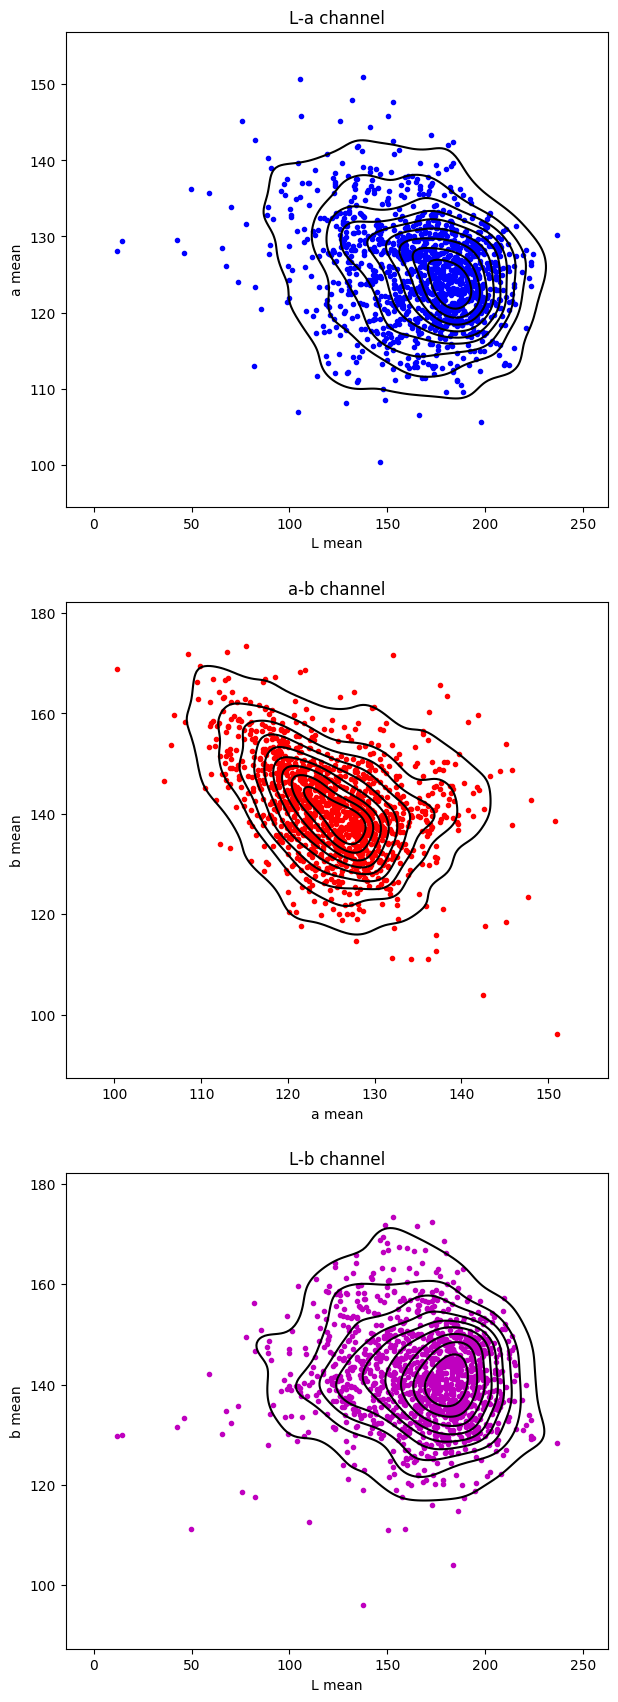

In [19]:
corr_channels_map(PROKUDIN_PATH)

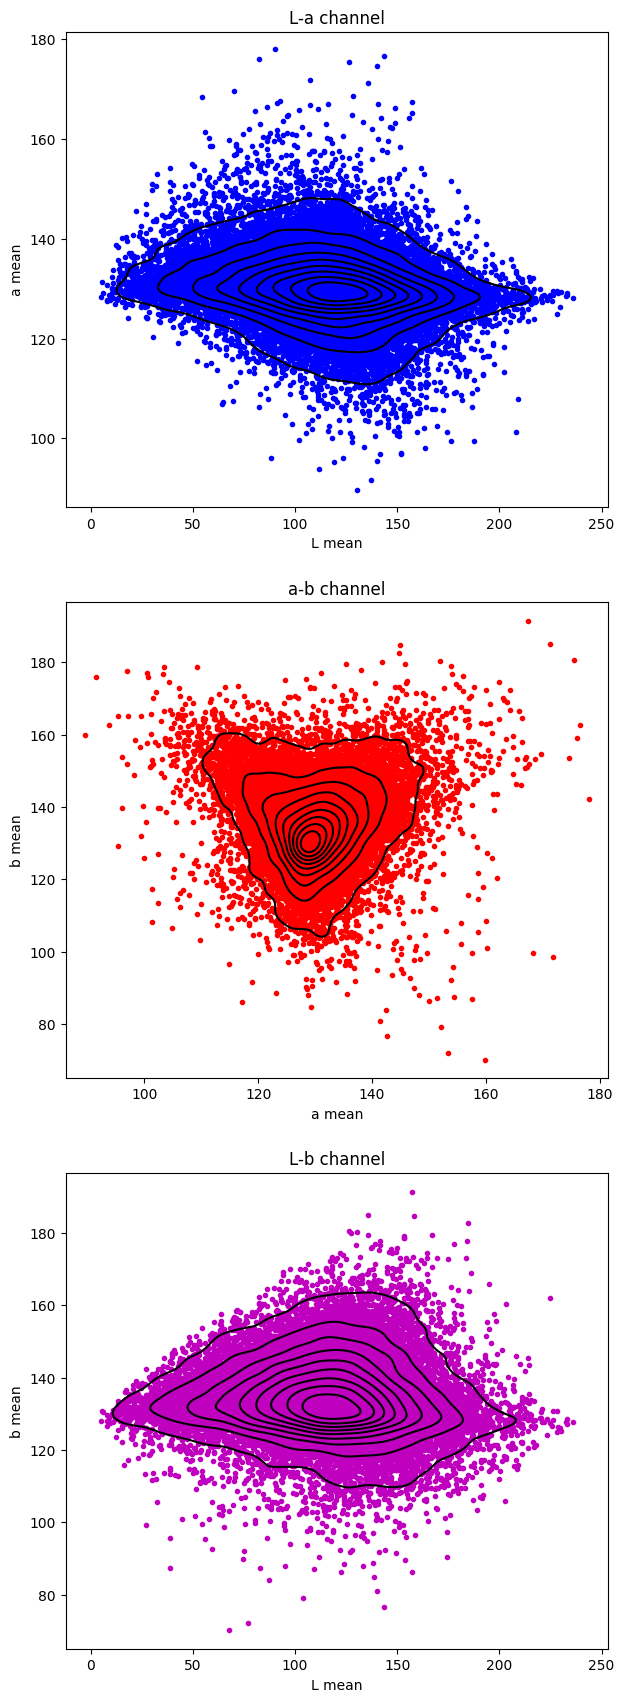

In [20]:
corr_channels_map(FLICKR30_PATH)

### Коэффициент корреляции между средними значениями канала

In [ ]:
def corr_channels(path:str):
    names = [os.path.join(path, i) for i in os.listdir(path)]

    l_ch_ = []
    a_ch_ = []
    b_ch_ = []
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})

        l_ch_.append(df_ch['l_ch'].mean())
        a_ch_.append(df_ch['a_ch'].mean())
        b_ch_.append(df_ch['b_ch'].mean())

    df_chs = pd.DataFrame({'l_ch': l_ch_, 'a_ch': a_ch_, 'b_ch': b_ch_})
    corr = df_chs.corr()
    print(corr)
    sns.heatmap(corr)


          l_ch      a_ch      b_ch
l_ch  1.000000 -0.237196 -0.067729
a_ch -0.237196  1.000000 -0.397433
b_ch -0.067729 -0.397433  1.000000


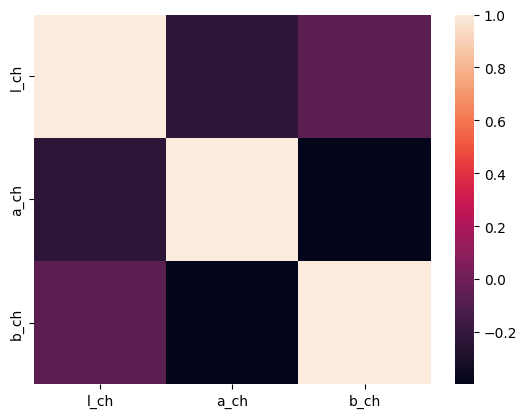

In [22]:
corr_channels(PROKUDIN_PATH)

          l_ch      a_ch      b_ch
l_ch  1.000000 -0.204178 -0.024760
a_ch -0.204178  1.000000  0.039467
b_ch -0.024760  0.039467  1.000000


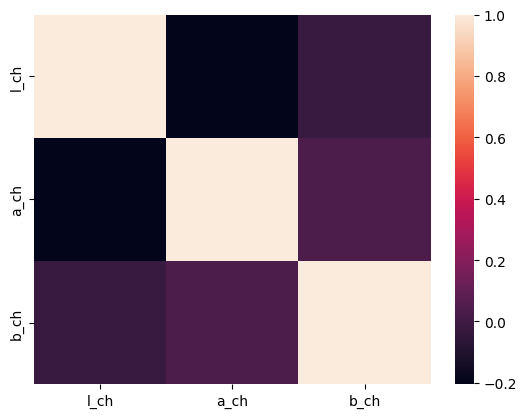

In [23]:
corr_channels(FLICKR30_PATH)

### Распределения среднеквадратичных отклонений 

In [ ]:
def corr_std_channels(path:str):
    names = [os.path.join(path, i) for i in os.listdir(path)]

    l_ch_ = []
    a_ch_ = []
    b_ch_ = []
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})
        l_ch_.append(df_ch['l_ch'].std())
        a_ch_.append(df_ch['a_ch'].std())
        b_ch_.append(df_ch['b_ch'].std())
    df_chs = pd.DataFrame(
        {
            'l_ch_std': l_ch_, 'a_ch_std': a_ch_, 'b_ch_std': b_ch_})

    corr = df_chs.corr()
    print(corr)
    sns.heatmap(corr)


          l_ch_std  a_ch_std  b_ch_std
l_ch_std  1.000000  0.214279 -0.105692
a_ch_std  0.214279  1.000000  0.420147
b_ch_std -0.105692  0.420147  1.000000


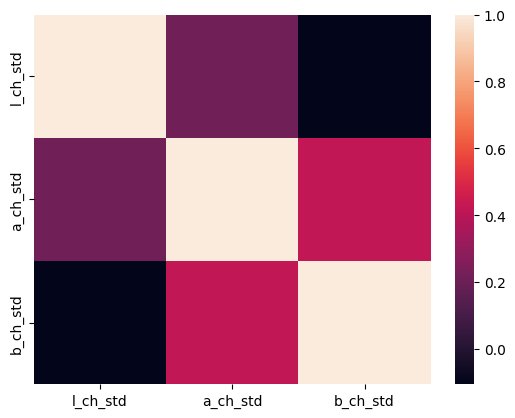

In [25]:
corr_std_channels(PROKUDIN_PATH)

          l_ch_std  a_ch_std  b_ch_std
l_ch_std  1.000000  0.049570  0.062518
a_ch_std  0.049570  1.000000  0.553499
b_ch_std  0.062518  0.553499  1.000000


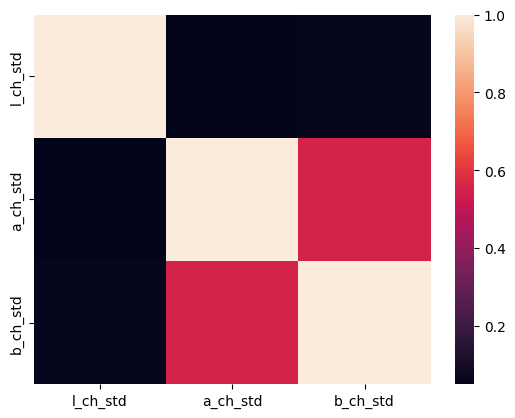

In [26]:
corr_std_channels(FLICKR30_PATH)

### Корреляции среднеквадратичных распределений разных каналов

In [ ]:
def corr_std_channels_map(path:str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    fig, axis = plt.subplots(3, figsize=(7, 21))
    
    axis[0].set_title('L-a channel')
    axis[1].set_title('a-b channel')
    axis[2].set_title('L-b channel')

    axis[0].set_xlabel('L std')
    axis[0].set_ylabel('a std')

    axis[1].set_xlabel('a std')
    axis[1].set_ylabel('b std')
    
    axis[2].set_xlabel('L std')
    axis[2].set_ylabel('b std')

    l_ch_std = []
    a_ch_std = []
    b_ch_std = []
    

    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})

        l_ch_std.append(df_ch['l_ch'].std())
        a_ch_std.append(df_ch['a_ch'].std())
        b_ch_std.append(df_ch['b_ch'].std())
    
    df_chs = pd.DataFrame(
        {
            'l_std':l_ch_std, 'a_std': a_ch_std, 'b_std': b_ch_std})
    axis[0].scatter(l_ch_std, a_ch_std, marker = '.', color = 'b')
    axis[1].scatter(a_ch_std, b_ch_std, marker = '.', color = 'r')
    axis[2].scatter(l_ch_std, b_ch_std, marker = '.', color = 'm')
    sns.kdeplot(df_chs, x='l_std', y='a_std', ax=axis[0], color='k')
    sns.kdeplot(df_chs, x='a_std', y='b_std', ax=axis[1], color='k')
    sns.kdeplot(df_chs, x='l_std', y='b_std', ax=axis[2], color='k')

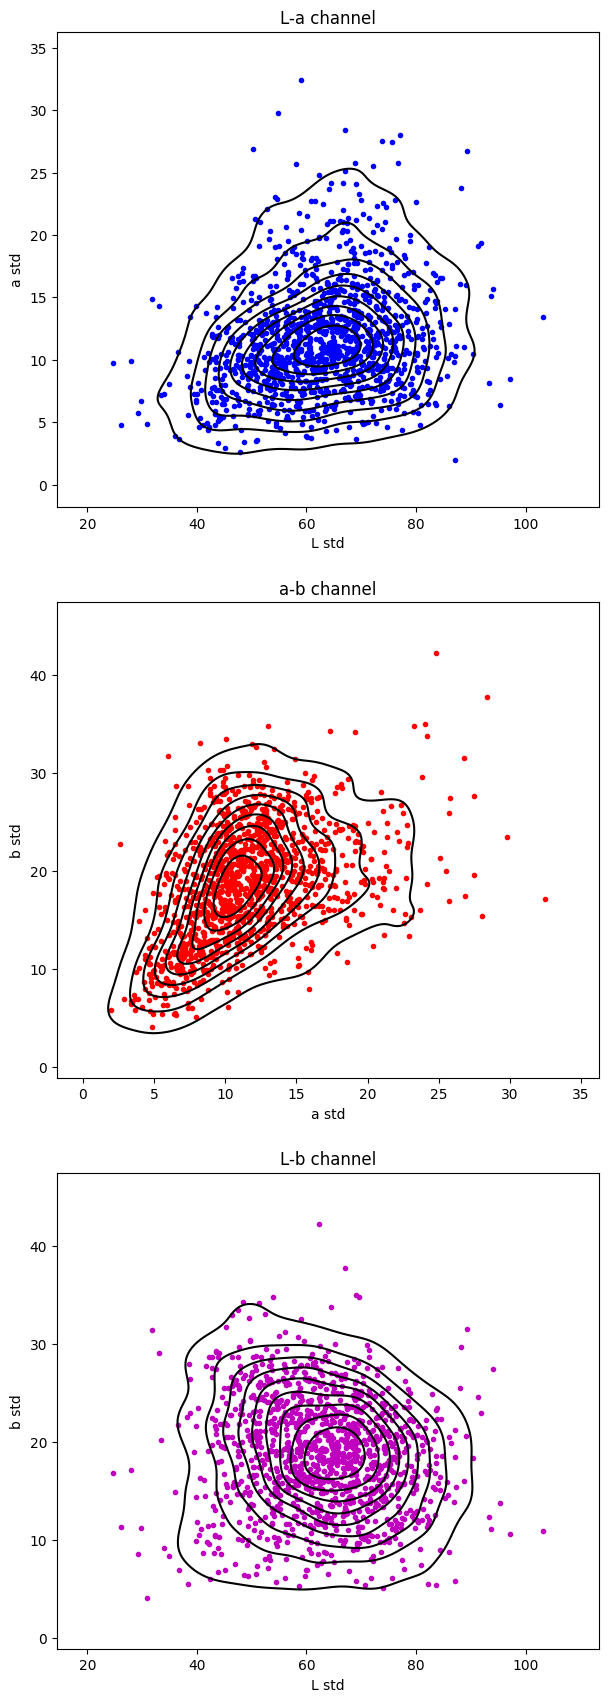

In [28]:
corr_std_channels_map(PROKUDIN_PATH)

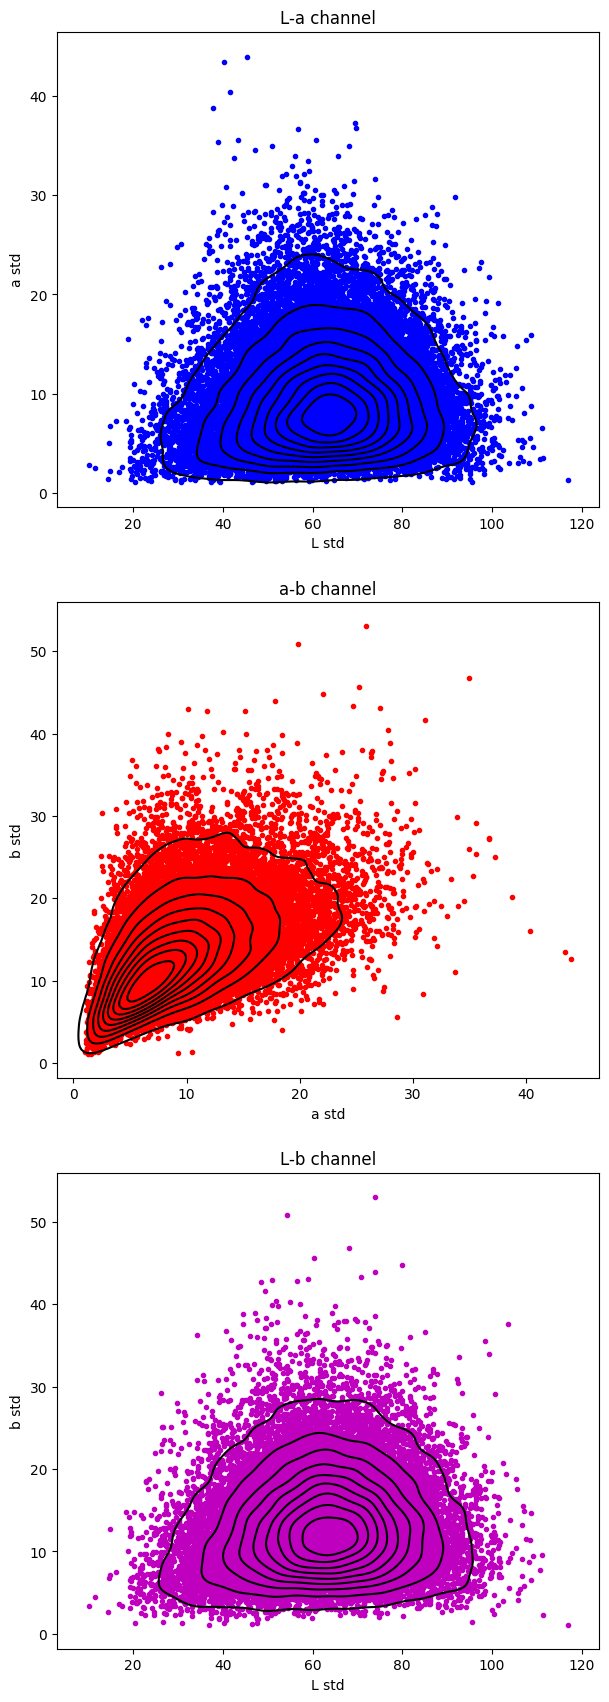

In [29]:
corr_std_channels_map(FLICKR30_PATH)

### Нормировка размеров

In [30]:
def downscaling(path: str, out_path: str, size: Tuple[int, int]):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, size)
        cv2.imwrite(os.path.join(out_path, os.path.split(name)[-1]), img)


In [31]:
downscaling(PROKUDIN_PATH, FINAL_DATASET_256, OUT_SIZE_256)

In [32]:
downscaling(FLICKR30_PATH, FINAL_DATASET_256, OUT_SIZE_256)

In [33]:
downscaling(PROKUDIN_PATH, FINAL_DATASET_128, OUT_SIZE_128)

In [34]:
downscaling(FLICKR30_PATH, FINAL_DATASET_128, OUT_SIZE_128)

### Метрики итогового датасета с размером 256х256

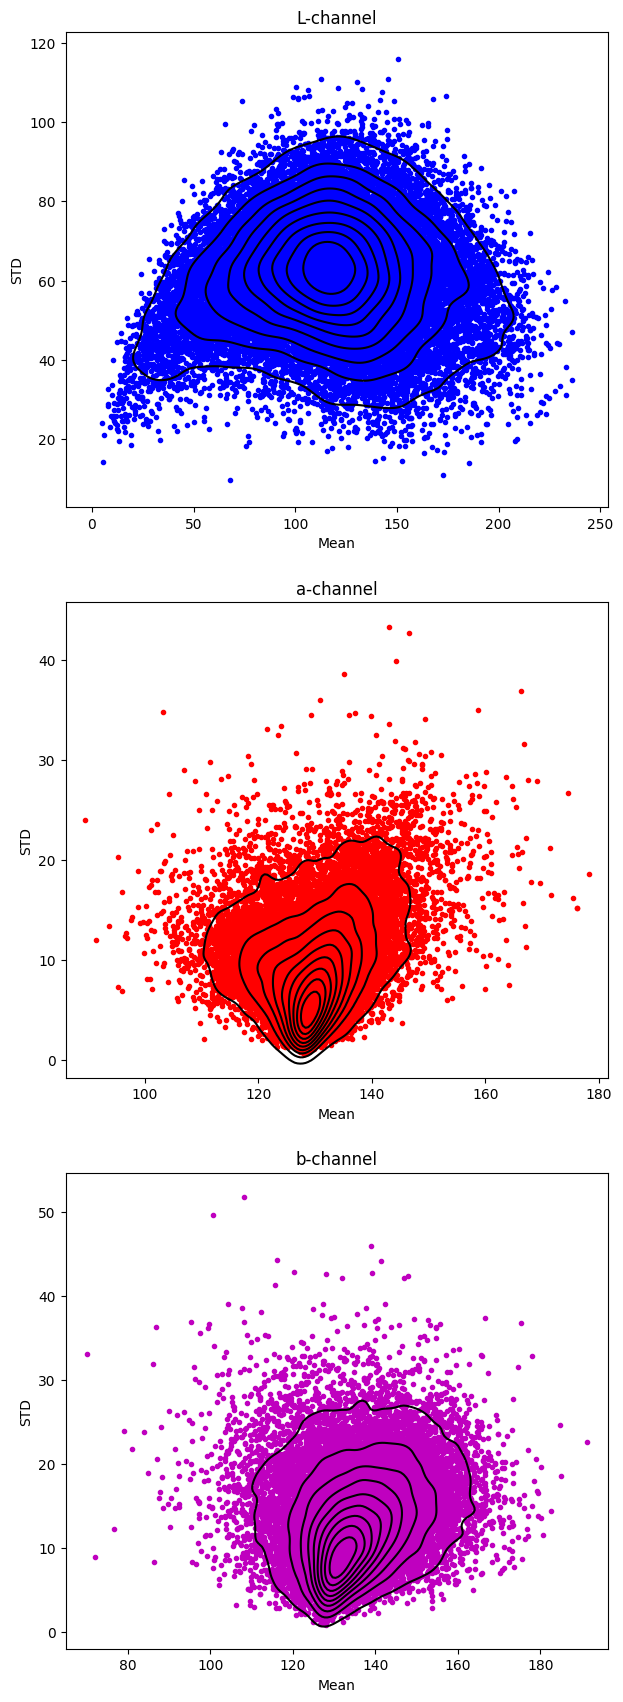

In [35]:
color_map(FINAL_DATASET_256)

          l_ch      a_ch      b_ch
l_ch  1.000000 -0.239314  0.018946
a_ch -0.239314  1.000000 -0.001842
b_ch  0.018946 -0.001842  1.000000


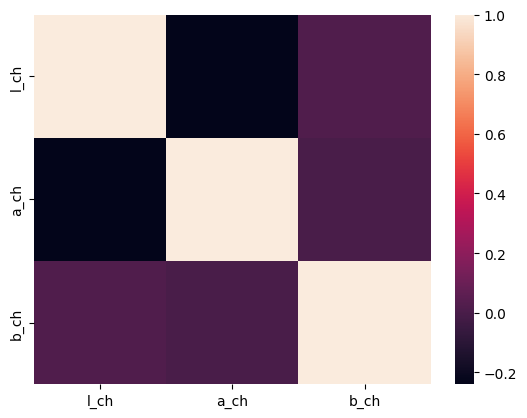

In [36]:
corr_channels(FINAL_DATASET_256)

          l_ch_std  a_ch_std  b_ch_std
l_ch_std  1.000000  0.034104  0.028978
a_ch_std  0.034104  1.000000  0.514171
b_ch_std  0.028978  0.514171  1.000000


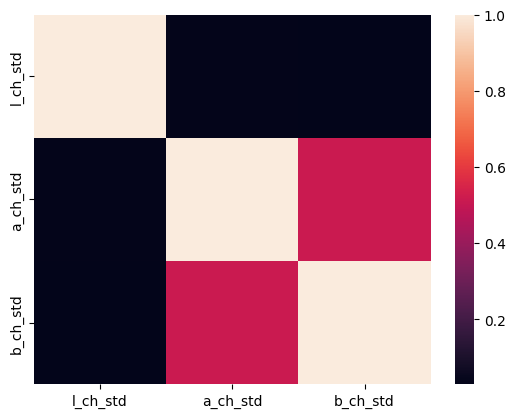

In [37]:
corr_std_channels(FINAL_DATASET_256)

### Метрики итогового датасета с размером 128х128

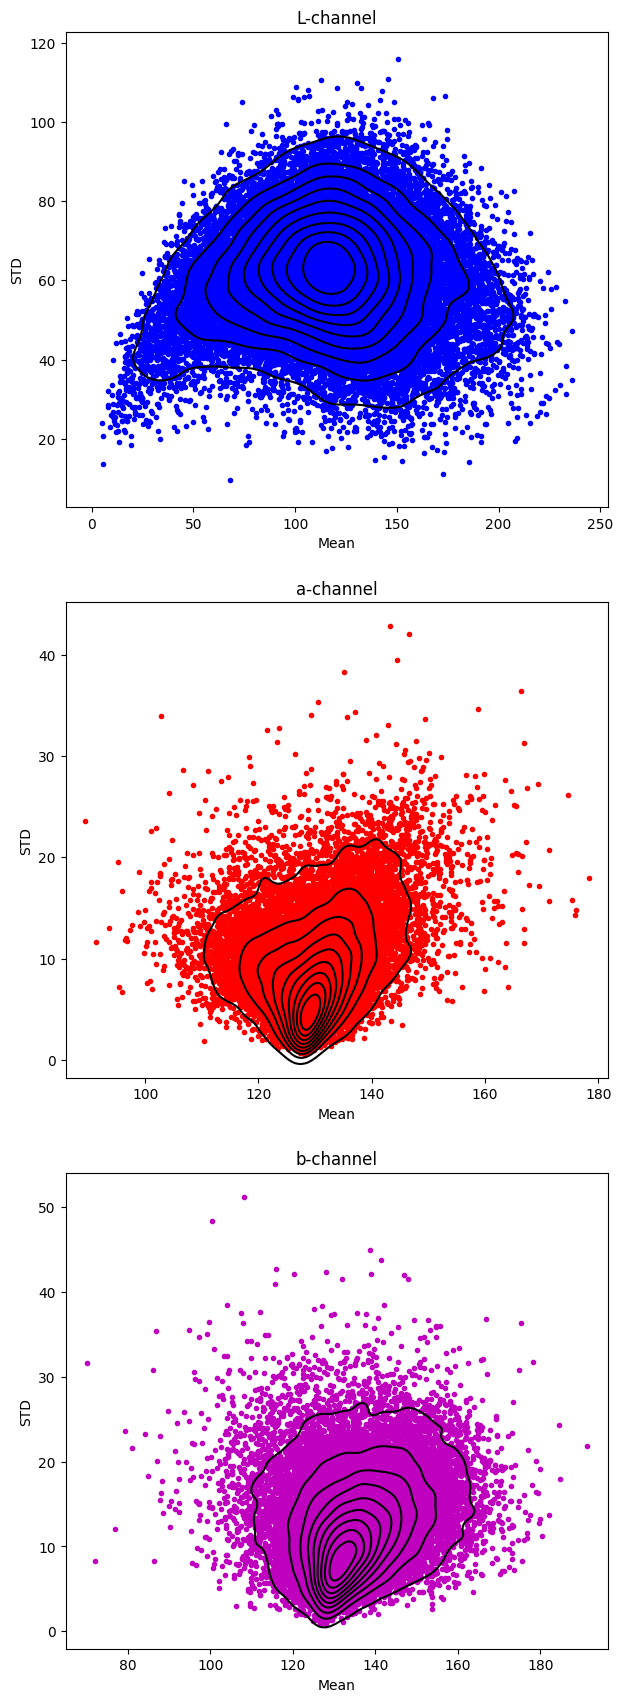

In [38]:
color_map(FINAL_DATASET_128)

          l_ch      a_ch      b_ch
l_ch  1.000000 -0.240345  0.020958
a_ch -0.240345  1.000000 -0.002667
b_ch  0.020958 -0.002667  1.000000


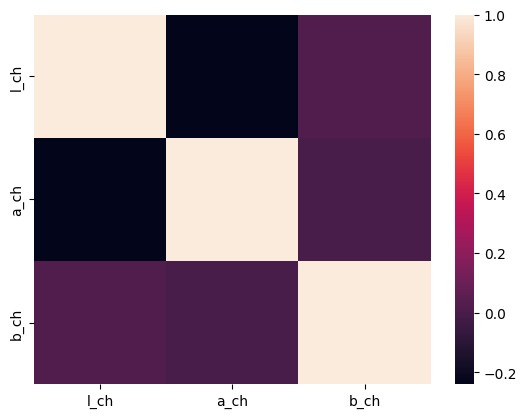

In [39]:
corr_channels(FINAL_DATASET_128)

          l_ch_std  a_ch_std  b_ch_std
l_ch_std  1.000000  0.026064  0.018500
a_ch_std  0.026064  1.000000  0.500508
b_ch_std  0.018500  0.500508  1.000000


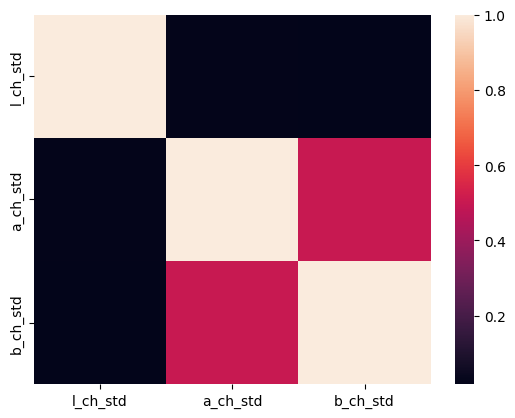

In [40]:
corr_std_channels(FINAL_DATASET_128)

### Гистограммы количества по разным характеристикам каналов для итоговых датасетов 

In [ ]:
def histogram(path: set):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    l_ch_ = []
    a_ch_ = []
    b_ch_ = []
    l_ch_std = []
    a_ch_std = []
    b_ch_std = []

    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_lab = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
        df_ch = pd.DataFrame(
            {
                'l_ch': img_lab[:,:, 0].flatten().flatten(),
                'a_ch' : img_lab[:,:, 1].flatten().flatten(),
                'b_ch' : img_lab[:,:, 2].flatten().flatten()})

        l_ch_.append(df_ch['l_ch'].mean())
        a_ch_.append(df_ch['a_ch'].mean())
        b_ch_.append(df_ch['b_ch'].mean())
        l_ch_std.append(df_ch['l_ch'].std())
        a_ch_std.append(df_ch['a_ch'].std())
        b_ch_std.append(df_ch['b_ch'].std())
            
    df_chs = pd.DataFrame(
        {
            'l_ch_mean': l_ch_, 'a_ch_mean': a_ch_, 'b_ch_mean': b_ch_,
            'l_std':l_ch_std, 'a_std': a_ch_std, 'b_std': b_ch_std})

    for i in df_chs.columns:
        axarr = df_chs.hist(column=i, bins=30)
        for ax in axarr.flatten():
            ax.set_xlabel(i)
            ax.set_ylabel("count")
        


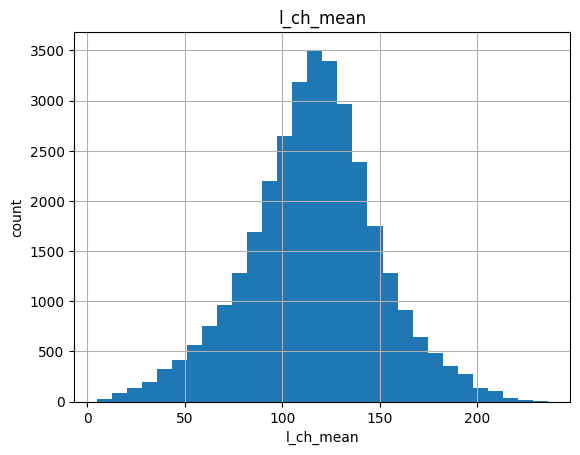

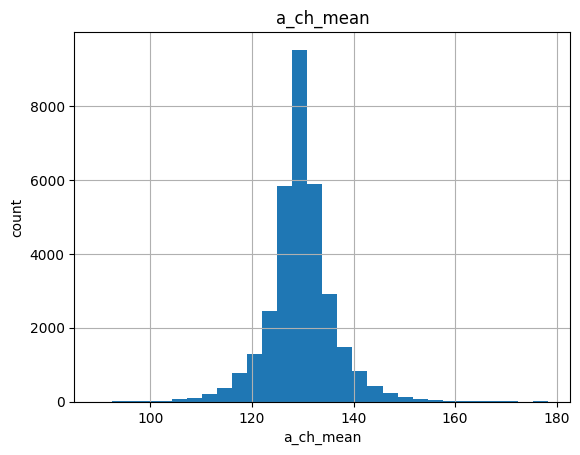

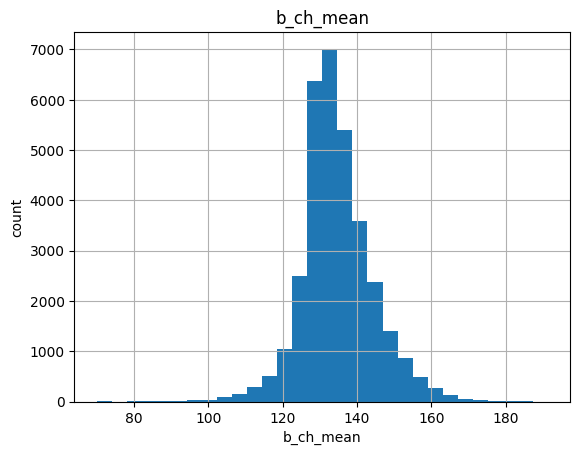

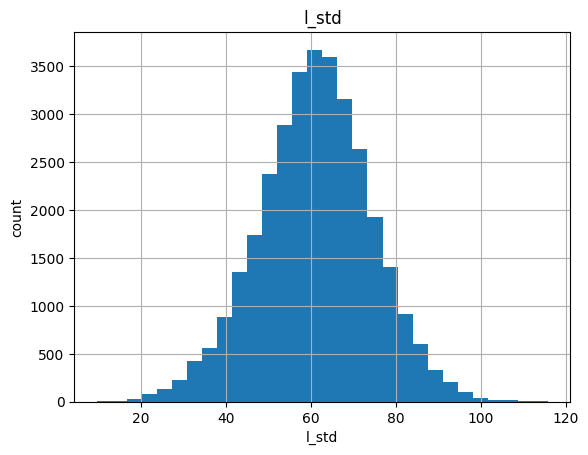

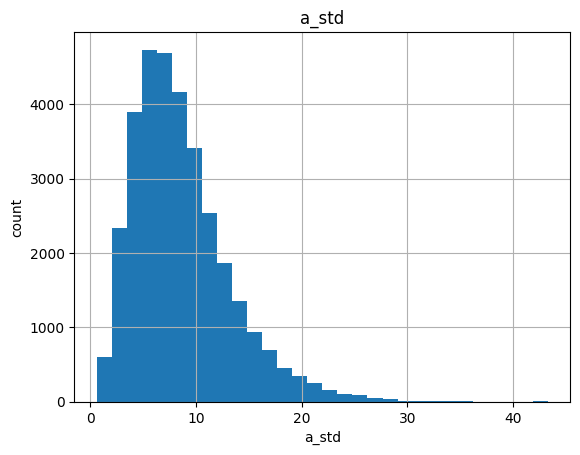

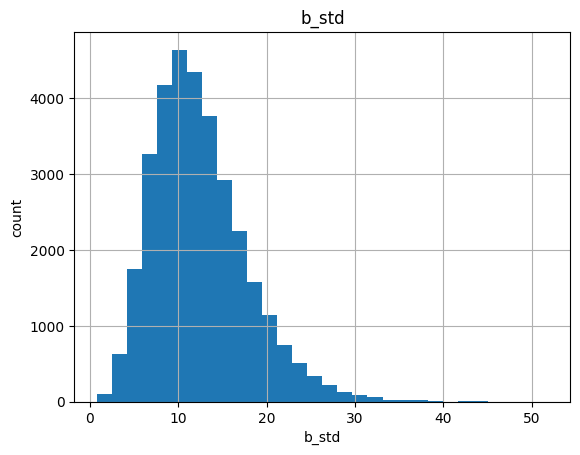

In [71]:
histogram(FINAL_DATASET_256)

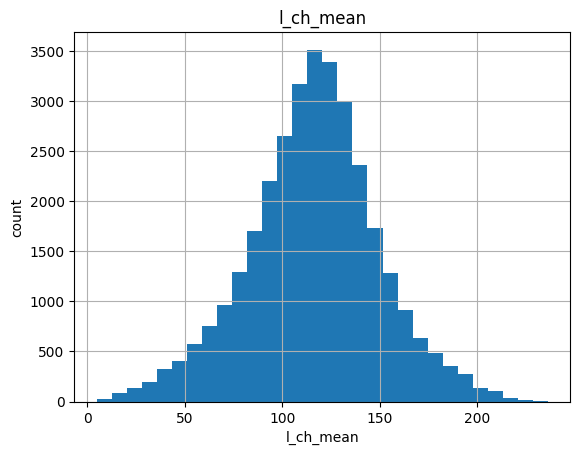

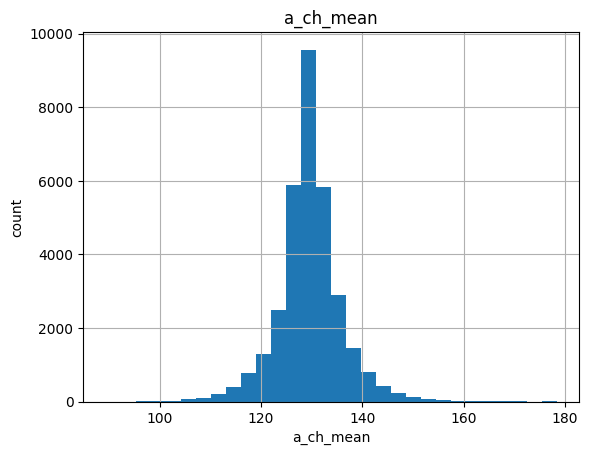

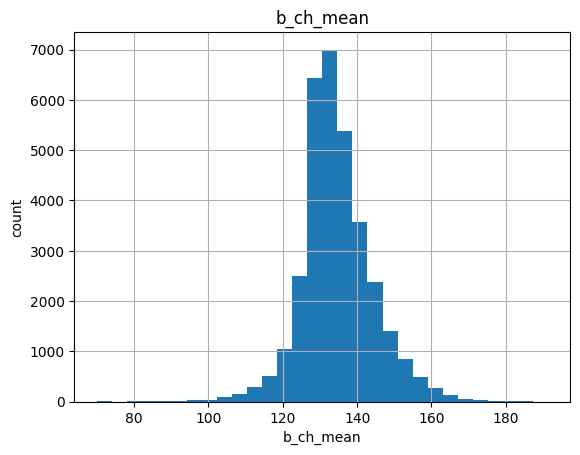

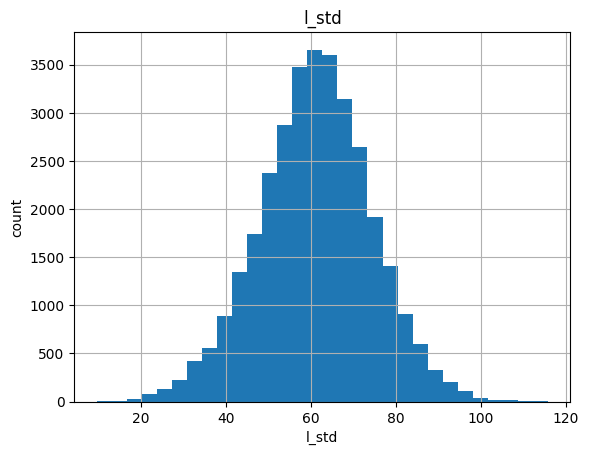

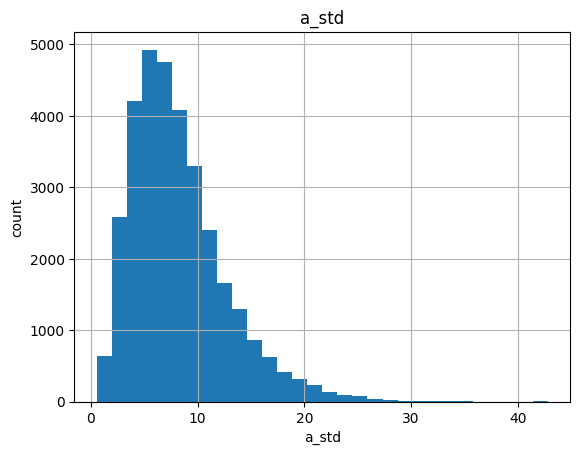

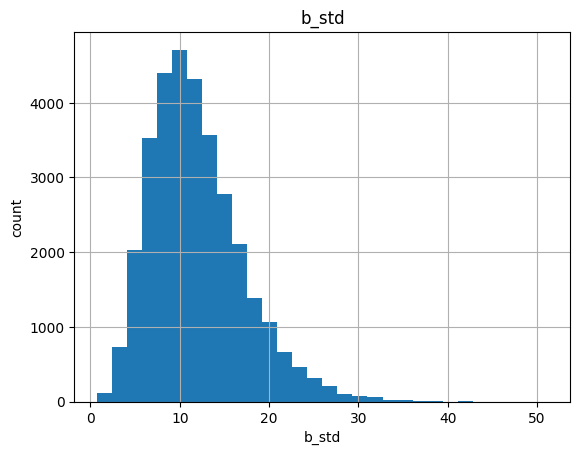

In [72]:
histogram(FINAL_DATASET_128)

### Отделение L канала

In [41]:
def l_separator(path: str, out_path: str):
    names = [os.path.join(path, i) for i in os.listdir(path)]
    for name in names:
        img = cv2.imread(name, cv2.IMREAD_COLOR)
        img_l = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))[:,:,0]
        cv2.imwrite(os.path.join(out_path, os.path.split(name)[-1]), img_l)

In [42]:
l_separator(FINAL_DATASET_256, L_DATASET_256)

In [43]:
l_separator(FINAL_DATASET_128, L_DATASET_128)

### Добавление шума к фотографии

In [ ]:
def add_noise(images, noise_factor=0.1):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)